# Pandas 1: Introduction

In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

## Series

### Exercise 1

In [5]:
V1 = np.zeros(26)
for i in range(len(V1)):
        V1[i] = i**2-1
        if np.remainder(V1[i], 3) != 0.0:
            V1[i] = 0.0

pd.Series(V1, index = np.linspace(0,50, 26))

0.0       0.0
2.0       0.0
4.0       3.0
6.0       0.0
8.0      15.0
10.0     24.0
12.0      0.0
14.0     48.0
16.0     63.0
18.0      0.0
20.0     99.0
22.0    120.0
24.0      0.0
26.0    168.0
28.0    195.0
30.0      0.0
32.0    255.0
34.0    288.0
36.0      0.0
38.0    360.0
40.0    399.0
42.0      0.0
44.0    483.0
46.0    528.0
48.0      0.0
50.0    624.0
dtype: float64

### Exercise 2

In [28]:
def investment(p, init = 100):
    # Initiate index
    index = pd.date_range("1/1/2000", "12/31/2000", freq='D')
    # Create list
    list = pd.Series(init*np.ones(len(index)), index)
    for i in range(1, len(index)):
        list[i] = max(0, (list[i-1]+1)*p + (list[i-1]-1)*(1-p))
    
    list = np.cumsum(list)
    return(list)

/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


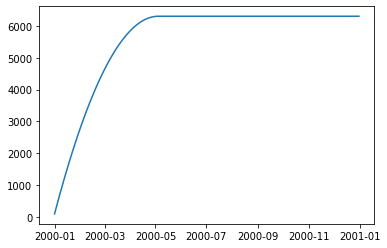

In [31]:
r = investment(0.1, init=100)
p = plt.plot(r.index, r.values)

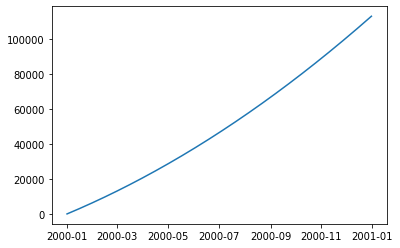

In [32]:
r = investment(0.8, init=200)
p = plt.plot(r.index, r.values)

## Viewing and Accessing Data

### Problem 3

In [46]:
#build toy data for SQL operations
name = ['Mylan', 'Regan', 'Justin', 'Jess', 'Jason', 'Remi', 'Matt', 'Alexander', 'JeanMarie']
sex = ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'M', 'F']
age = [20, 21, 18, 22, 19, 20, 20, 19, 20]
rank = ['Sp', 'Se', 'Fr', 'Se', 'Sp', 'J', 'J', 'J', 'Se']
ID = range(9)
aid = ['y', 'n', 'n', 'y', 'n', 'n', 'n', 'y', 'n']
GPA = [3.8, 3.5, 3.0, 3.9, 2.8, 2.9, 3.8, 3.4, 3.7]
mathID = [0, 1, 5, 6, 3]
mathGd = [4.0, 3.0, 3.5, 3.0, 4.0]
major = ['y', 'n', 'y', 'n', 'n']
studentInfo = pd.DataFrame({'ID': ID, 'Name': name, 'Sex': sex, 'Age': age,'Class': rank})
otherInfo = pd.DataFrame({'ID': ID, 'GPA': GPA, 'Financial_Aid': aid})
mathInfo = pd.DataFrame({'ID': mathID, 'Grade': mathGd, 'Math_Major': major})


,ID,Name,Sex,Age,Class
0,0,Mylan,M,20,Sp
1,1,Regan,F,21,Se
2,2,Justin,M,18,Fr
3,3,Jess,F,22,Se
4,4,Jason,M,19,Sp
5,5,Remi,F,20,J
6,6,Matt,M,20,J
7,7,Alexander,M,19,J
8,8,JeanMarie,F,20,Se


In [41]:
# AND
studentInfo[(studentInfo['Age'] >= 19) & (studentInfo['Sex'] == 'M')][['ID', 'Name']]


,ID,Name
0,0,Mylan
4,4,Jason
6,6,Matt
7,7,Alexander


In [42]:
# OR
studentInfo[(studentInfo['Age'] >= 19) | (studentInfo['Sex'] == 'M')][['ID', 'Name']]

,ID,Name
0,0,Mylan
1,1,Regan
2,2,Justin
3,3,Jess
4,4,Jason
5,5,Remi
6,6,Matt
7,7,Alexander
8,8,JeanMarie


In [43]:
# NOT
studentInfo[(studentInfo['Age'] >= 19) | (studentInfo['Sex'] != 'M')][['ID', 'Name']]

,ID,Name
0,0,Mylan
1,1,Regan
3,3,Jess
4,4,Jason
5,5,Remi
6,6,Matt
7,7,Alexander
8,8,JeanMarie


### Exercise 4

In [50]:
MaleInfo = pd.merge(studentInfo[studentInfo['Sex'] == 'M'][['ID', 'Age', ]],
                   mathInfo[['ID', 'Grade']], on='ID', how='outer')
MaleInfo

,ID,Age,Grade
0,0,20.0,4.0
1,2,18.0,NaN
2,4,19.0,NaN
3,6,20.0,3.0
4,7,19.0,NaN
5,1,NaN,3.0
6,5,NaN,3.5
7,3,NaN,4.0


# Pandas 2: Plotting

In [57]:
from pydataset import data

In [82]:
titanic = pd.read_csv('titanic.csv')
#data("Titanic", show_doc=True)

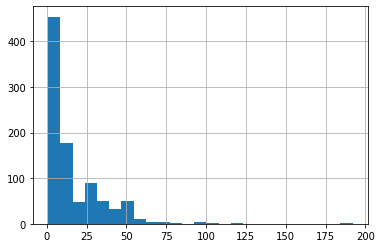

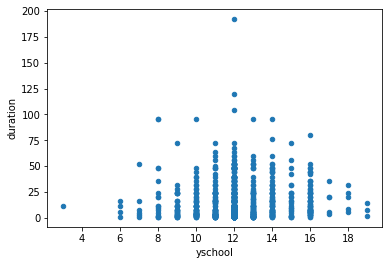

In [87]:
### The bfeed
bfeed = data("bfeed")
'''
Most women do not breast feed their baby or less than 8 weeks.
Those who do usually feed them between 8 and 14 weeks.
Very few women breastfeed their baby more than 50 weeks.
While more educated women breastfeed their baby slightly more, the difference is small.
'''
#data("bfeed", show_doc=True)

bfeed["duration"].hist(grid="False", bins=25)
bfeed.plot(kind="scatter",x="yschool", y="duration")
#pd.plotting.scatter_matrix(bfeed[["poverty", "delta", "smoke"]])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122b8b828>,
      dtype=object)

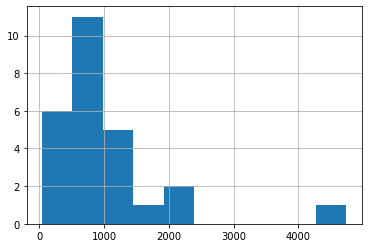

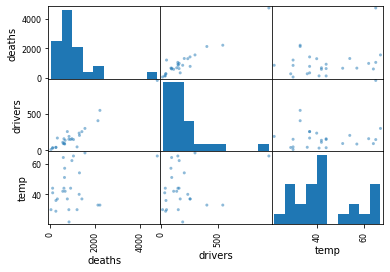

In [92]:
road = data("road")
#data("road", show_doc=True)
'''
The annual number of deaths on the road per state is around 500-1000 deaths per state.
One state is an outlier with more than 4000 deaths per year.
There are more deaths when temperatures are higher.
There is a positive correlation between the number of deaths and the number of drives.
'''

road["deaths"].hist(grid="False", bins=10)
pd.plotting.scatter_matrix(road[["deaths", "drivers", "temp"]])

# Pandas 3: Grouping

## Groupby

### Exercise 1

In [143]:
iris = data("iris")
poisons = data("poisons")
diamonds = data("diamonds")

Text(0, 0.5, 'Species classification')

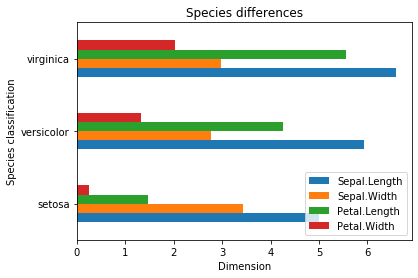

In [95]:
### IRIS
iris_g = iris.groupby("Species")
iris_g[["Sepal.Length", "Sepal.Width", "Petal.Length", "Petal.Width"]].mean().plot(
        kind = "barh", title = "Species differences")
plt.xlabel("Dimension")
plt.ylabel("Species classification")
'''
Setosa is the easiest species to distinguish because its petal is very thin and very short, 
unlike virginia and versicolor.
It is harder to distinguish the flowers based on their sepal because they are about the same size.

You could use the petal width to distinguish the different flowers.
'''

In [101]:
### Poisons
iris_g = iris.groupby("Species")
iris_g[["Sepal.Length", "Sepal.Width", "Petal.Length", "Petal.Width"]].mean().plot(
        kind = "barh", title = "Species differences")
plt.xlabel("Dimension")
plt.ylabel("Species classification")
'''
Setosa is the easiest species to distinguish because its petal is very thin and very short, 
unlike virginia and versicolor.
It is harder to distinguish the flowers based on their sepal because they are about the same size.

You could use the petal width to distinguish the different flowers.
'''

{'setosa', 'versicolor', 'virginica'}

In [117]:
#data("poisons", show_doc=True)

In [104]:
poisons_p = poisons.groupby("poison")
poisons_t = poisons.groupby("treat")

'''
Poison 1 is most deadly in general is treatment B is most effective.
'''

poisons_p["time"].describe()

,count,mean,std,min,25%,50%,75%,max
poison,,,,,,,,
1,16.0,0.617500,0.209428,0.31,0.4500,0.625,0.730,1.10
2,16.0,0.544375,0.289366,0.23,0.3575,0.420,0.635,1.24
3,16.0,0.276250,0.062276,0.18,0.2275,0.270,0.315,0.38


In [105]:
poisons_t["time"].describe()

,count,mean,std,min,25%,50%,75%,max
treat,,,,,,,,
A,12.0,0.314167,0.102288,0.18,0.2275,0.300,0.4075,0.46
B,12.0,0.676667,0.320832,0.29,0.3775,0.665,0.8900,1.24
C,12.0,0.392500,0.167013,0.22,0.2475,0.375,0.4425,0.76
D,12.0,0.534167,0.219440,0.30,0.3525,0.505,0.6725,1.02


In [113]:
poisons_pt = poisons.groupby(["poison", "treat"])

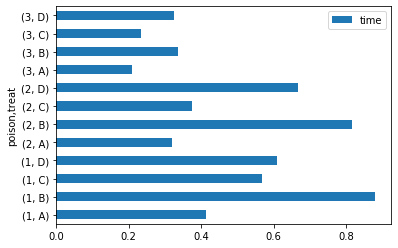

In [116]:
poisons_pt.mean().plot(kind="barh")
'''
If I didn't know which poison, I would choose treatment B because
animals treated with this treatment survive the longest for all 3 poisons.
'''

In [165]:
#data("diamonds", show_doc=True)

In [160]:
#diamonds.insert(10, "Pricepercarat", diamonds.price / diamonds.carat) 
diamonds_col = diamonds[["color", "Pricepercarat", "price"]].groupby("color")
diamonds_cut = diamonds[["cut", "Pricepercarat", "price"]].groupby("cut")

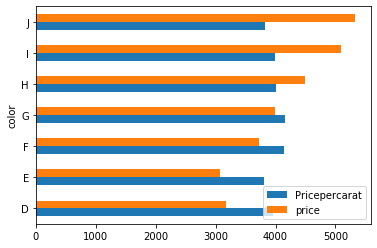

In [161]:
diamonds_col.mean().plot(kind="barh")

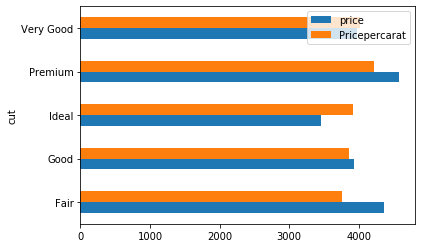

In [162]:
diamonds_cut[["price", "Pricepercarat"]].mean().plot(kind="barh")

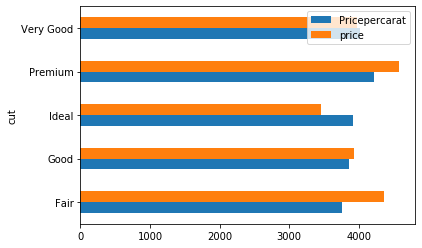

In [164]:
'''
The higher the color on the D-J scale, the more expensive the diamond in terms of raw price.
However, the relationship fades when looking at the price per carat
In terms of cut: premium is the most expensive in terms of price per carat, but
in terms of rax price fair is also expensive.

H + Fair sell for a higher price than those with an Ideal cut because they are bigger!
When looking at the price per carat, the puzzle disappears!
'''
diamonds_cutH = diamonds[["cut", "Pricepercarat", "price", "color"]][diamonds.color=="H"].groupby("cut")
diamonds_cut.mean().plot(kind="barh")





## Pivot Tables

### Exercise 2

In [167]:
# Check the survival rates of the passengers based on where they embarked from 
# (given the "Embarked" column) & create a pivot table to examine survival rates based
# on both place of embarkment and gender.

titanic.pivot_table(values="Survived",
                   columns = "Embarked",
                   aggfunc = "mean")

Embarked,C,Q,S
Survived,0.555556,0.357724,0.332604


In [168]:
titanic.pivot_table(values="Survived",
                   index = "Sex", 
                   columns = "Embarked",
                   aggfunc = "mean")

Embarked,C,Q,S
Sex,,,
female,0.902655,0.616667,0.680412
male,0.305732,0.111111,0.170144


In [172]:
'''
I don't believe these tables mean much in terms of the causal relationship
between embarkment place and survival rate. 
Unlike my initial intuition, there does not seem to be a correlation between
the class and the embarkment rate which could have explained the figures above.

The last table shows that there were more kids who embarked in the port C.
As kids have been shown to have a higher survival rate, this could explain the 
figures above.

The tables confirm that women survived more than men.
'''
titanic.pivot_table(values="Survived",
                   index = "Pclass", 
                   columns = "Embarked",
                   aggfunc = "mean")


Embarked,C,Q,S
Pclass,,,
1.0,0.687943,0.666667,0.559322
2.0,0.571429,0.285714,0.417355
3.0,0.366337,0.353982,0.210101


In [174]:
age = pd.cut(titanic['Age'], [0, 12, 18, 80])
titanic.pivot_table(values="Survived",
                   index = age, 
                   columns = "Embarked",
                   aggfunc = "mean")

Embarked,C,Q,S
Age,,,
"(0, 12]",0.812500,0.00000,0.561644
"(12, 18]",0.666667,0.50000,0.333333
"(18, 80]",0.600000,0.25641,0.337520


# Pandas 4: Time Series

## Working with Dates and Times

### Exercise 1

In [186]:
Djia = pd.read_csv('DJIA.csv')
Djia

,DATE,VALUE
0,2006-09-27,11689.24
1,2006-09-28,11718.45
2,2006-09-29,11679.07
3,2006-10-02,11670.35
4,2006-10-03,11727.34
5,2006-10-04,11850.61
6,2006-10-05,11866.69
7,2006-10-06,11850.21
8,2006-10-09,11857.81
9,2006-10-10,11867.17


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


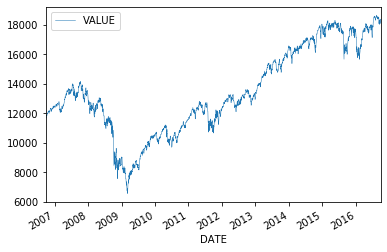

In [192]:
Djia.DATE = pd.to_datetime(Djia.DATE)
Djia['VALUE'][Djia.VALUE == "."] = "NaN"
Djia = Djia.dropna()
Djia['VALUE'] = Djia['VALUE'].astype(float)
Djia.plot(x="DATE", y="VALUE", lw=.5)





### Exercise 2

In [211]:
paye = pd.read_csv('paychecks.csv', header=None)
paye_e = paye.ix[:,0]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [220]:
indexT = pd.date_range(start='3/13/2008', periods = 93, freq="14d")
indexT

DatetimeIndex(['2008-03-13', '2008-03-27', '2008-04-10', '2008-04-24',
               '2008-05-08', '2008-05-22', '2008-06-05', '2008-06-19',
               '2008-07-03', '2008-07-17', '2008-07-31', '2008-08-14',
               '2008-08-28', '2008-09-11', '2008-09-25', '2008-10-09',
               '2008-10-23', '2008-11-06', '2008-11-20', '2008-12-04',
               '2008-12-18', '2009-01-01', '2009-01-15', '2009-01-29',
               '2009-02-12', '2009-02-26', '2009-03-12', '2009-03-26',
               '2009-04-09', '2009-04-23', '2009-05-07', '2009-05-21',
               '2009-06-04', '2009-06-18', '2009-07-02', '2009-07-16',
               '2009-07-30', '2009-08-13', '2009-08-27', '2009-09-10',
               '2009-09-24', '2009-10-08', '2009-10-22', '2009-11-05',
               '2009-11-19', '2009-12-03', '2009-12-17', '2009-12-31',
               '2010-01-14', '2010-01-28', '2010-02-11', '2010-02-25',
               '2010-03-11', '2010-03-25', '2010-04-08', '2010-04-22',
      

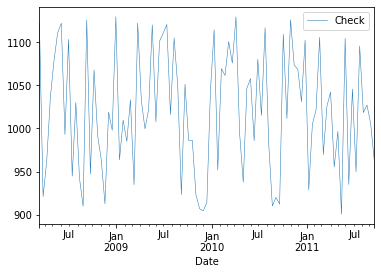

In [222]:
paye_series = pd.DataFrame({'Date': indexT, 
                            'Check': paye_e})
paye_series.plot(x="Date", y="Check", lw=.5)


## Periods

## Operations on Time Series

## Elementary Time Series Analysis

### Exercise 5

In [238]:
paye_series = pd.DataFrame({'Date': indexT, 
                            'Check': paye_e})
paye_series2 = paye_series.set_index('Date')

In [279]:
# Daily
daily = np.array(np.repeat(paye_series.Check, 14) / 14)
paye_day = pd.DataFrame({"daily": daily,
                    "index": pd.date_range("2008-03-13", freq="D", periods = 1302)})

paye_day['diff'] = paye_day['daily'] - paye_day['daily'].shift(1)
paye_day = paye_day.dropna()

In [280]:
paye_day[paye_day["diff"] == max(paye_day["diff"])]

,daily,index,diff
182,80.413571,2008-09-11,15.425714


In [281]:
paye_day[paye_day["diff"] == min(paye_day["diff"])]

,daily,index,diff
14,65.787857,2008-03-27,-14.373571


In [289]:
#Monthly
paye_month = paye_series2.resample('M', how='sum', fill_method='bfill')
paye_month["diff"] =  paye_month['Check'] - paye_month['Check'].shift(1)
paye_month = paye_month.dropna()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).sum().bfill()
  


In [290]:
paye_month[paye_month["diff"] == max(paye_month["diff"])]

,Check,diff
Date,,
2011-06-30,3085.15,1188.18


In [291]:
paye_month[paye_month["diff"] == min(paye_month["diff"])]

,Check,diff
Date,,
2010-08-31,1892.63,-1319.19


### Exercise 6

In [365]:
Djia2 = Djia.set_index('DATE')

rolling30 = Djia2[["VALUE"]].rolling(window=30).mean()
span30 = Djia2.ewm(span=30).mean()
rolling120 = Djia2[["VALUE"]].rolling(window=120).mean()
span120 = Djia2.ewm(span=120).mean()
rolling365 = Djia2[["VALUE"]].rolling(window=365).mean()
span365 = Djia2.ewm(span=365).mean()
minrol30 = np.min(rolling30)[0]
minrol120 = np.min(rolling120.dropna())[0]
minrol365 = np.min(rolling365.dropna())[0]
maxrol30 = np.max(rolling30.dropna())[0]
maxrol120 = np.max(rolling120.dropna())[0]
maxrol365 = np.max(rolling365.dropna())[0]

Djia2["span30"] = span30
Djia2["rolling30"] = rolling30
Djia2["span120"] = span120
Djia2["rolling120"] = rolling120
Djia2["span365"] = span365
Djia2["rolling365"] = rolling365
Djia2["min30"] = minrol30
Djia2["min120"] = minrol120
Djia2["min365"] = minrol365
Djia2["max30"] = maxrol30
Djia2["max120"] = maxrol120
Djia2["max365"] = maxrol365


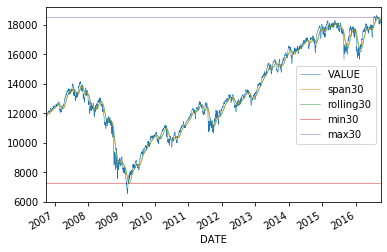

In [367]:
Djia2.plot(y=["VALUE", "span30", "rolling30", "min30", "max30"], lw=.5)


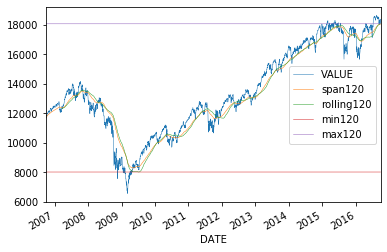

In [368]:
Djia2.plot(y=["VALUE", "span120", "rolling120", "min120", "max120"], lw=.5)


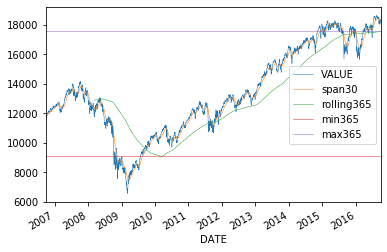

In [369]:
Djia2.plot(y=["VALUE", "span30", "rolling365", "min365", "max365"], lw=.5)
